In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# 读取 .dta 文件
# df = pd.read_stata(r'C:\Users\Administrator\Desktop\政府购买\518did.dta')
# df['accper'] = pd.to_datetime(df['accper'])
# df.drop(['date','quarter'],axis=1, inplace=True)
#df.to_stata('new518.dta')

df = pd.read_stata(r'C:\Users\Administrator\Desktop\政府购买\new518.dta')

In [14]:
# 假设你的 DataFrame 是 df，并且其中包含 'accper', 'gc' 和 'stkcd'（公司名）列

# 首先，将数据框重塑成宽格式
df_pivot = df.pivot(index='stkcd', columns='accper', values='gc')

# 然后，创建热力图
plt.figure(figsize=(12, 200))
sns.heatmap(df_pivot,cmap='coolwarm')

plt.show()

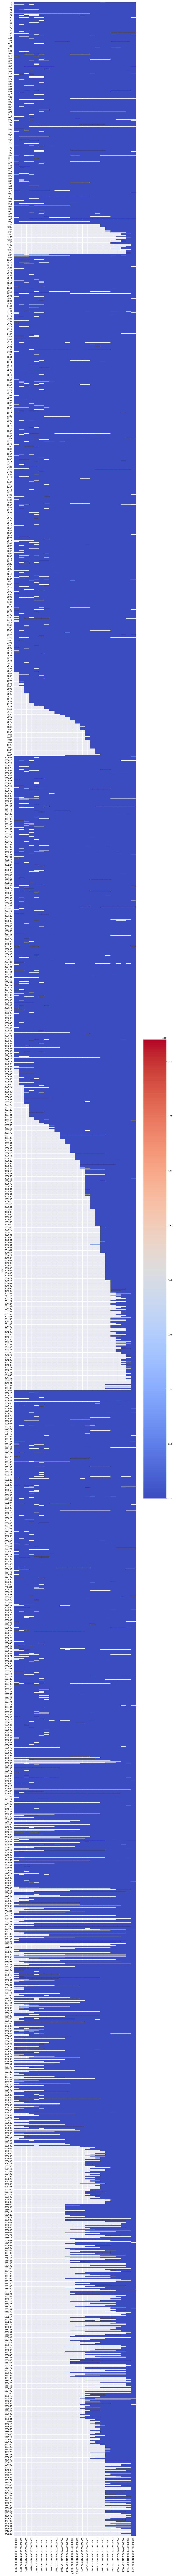

In [18]:
df.isnull().sum()

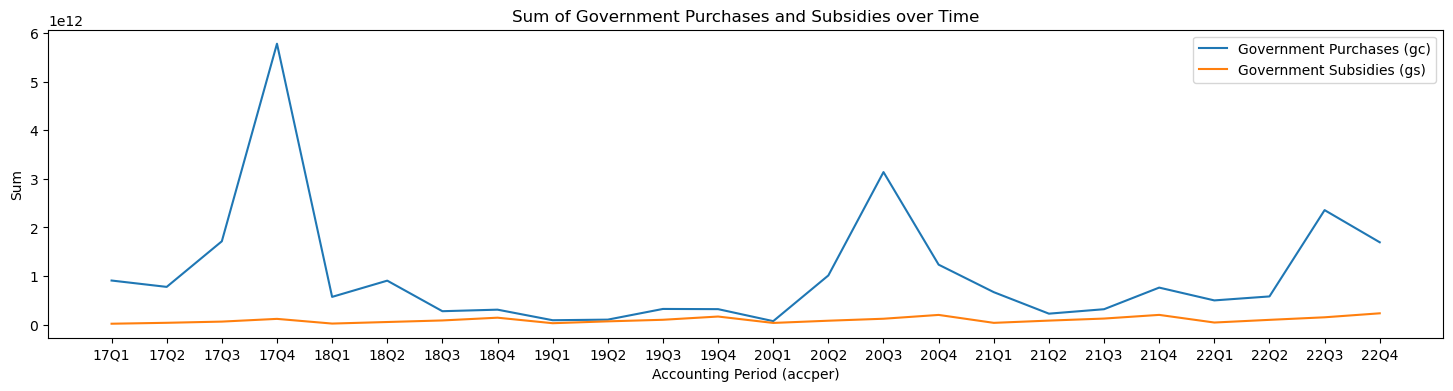

In [27]:
df_grouped = df.groupby('accper')[['gc', 'gs']].sum().reset_index()

# 假设你的 DataFrame 是 df

# 创建一个新列 'quarter_label'，表示年和季度
df['quarter_label'] = df['accper'].dt.to_period('Q').dt.strftime('%yQ%q')

df_grouped = df.groupby('quarter_label')[['gc', 'gs']].sum().reset_index()

# 创建图形和轴
fig, ax = plt.subplots(figsize=(3 * 6, 4))  # 原始大小通常是 (6, 4)，你可以根据需要调整

# 绘制 gc 和 gs 的线条
ax.plot(range(len(df_grouped)), df_grouped['gc'], label='Government Purchases (gc)')
ax.plot(range(len(df_grouped)), df_grouped['gs'], label='Government Subsidies (gs)')

# 添加标题和标签
ax.set_title('Sum of Government Purchases and Subsidies over Time')
ax.set_xlabel('Accounting Period (accper)')
ax.set_ylabel('Sum')
ax.legend()

# 设置 x 轴的刻度和标签
ax.set_xticks(range(len(df_grouped))[::1])  # 每四个标签显示一次，你可以根据需要调整
ax.set_xticklabels(df_grouped['quarter_label'][::1])  # 旋转标签，使其更易读

# 显示图形
plt.show()


In [ ]:
col_descriptions = {
   'stkcd': '上市公司的股票代码',
   'accper': '会计期间，可能是财务报表的日期',
   'sales': '上市公司的销售收入（单位：元）',
   'gc': '政府采购的金额（按照季度累计）（单位：元）',
   'ppegrowth': '固定资产投资的增长率',
   'bm': '账面市值比',
   'asset': '公司总资产(可以删除）',
   'size': '上市公司的规模（可能是以销售收入，资产或市值计）',
   'roa': '资产回报率',
   'roe': '权益回报率',
   'margin': '利润率',
   'first': '第一大股东持股比例',
   'gs': '政府补贴的金额（按照季度累计）（单位：元）',
   'Pandemic': '大流行虚拟变量，标记观察期是否在大流行期间',
   'treat': '处理组虚拟变量，标记公司是否接受了某种“处理”（如政府采购）',
   'Pandemic_treat': '大流行和处理的交互项，用于DID模型'
}